# Модели данных

   __Объект Python__ – это набор данных и методов. __Класс__ – это концептуальная схема, которая объединяет данные и функциональности в единое целое. Создание нового класса влечет новый тип объекта, позволяя формировать экземпляры этого типа.

   __Модель Django__ – это источник информации и поведения данных. Она состоит из класса Python, который является подклассом __django.db.models.Model__. Каждой модели ставится в соответствие одна таблица базы данных, где каждый атрибут класса соотносится с полем базы данных. Когда вы будете создавать модель, Django будет предоставлять практичный API, чтобы запрашивать объекты в базе данных.

### Основные Концепции Модели Данных в Django

   * __Определение Модели__:<br></br>
   Модель в Django представляет собой класс Python, наследующийся от __django.db.models.Model__.
   Каждый атрибут класса модели представляет поле в базе данных.<br></br>
   * __Типы Полей__:<br></br>
   Django предоставляет разнообразные типы полей для моделей, включая<br></br>
       * __CharField()__ для коротких строк,
       * __TextField()__ для длинного текста,
       * __IntegerField()__ для целых чисел,
       * __DateField()__ и
       * __DateTimeField()__ для дат и времени, и другие.<br></br>
       Каждое поле может иметь дополнительные атрибуты, такие как __max_length()__ для __CharField()__, определяющие ограничения и поведение этих полей.<br></br>
   * __Отношения Между Моделями__:<br></br>
   Django поддерживает создание отношений между различными моделями:<br></br>
       * __ForeignKey()__ для отношений один-ко-многим.
       * __ManyToManyField()__ для отношений многие-ко-многим.
       * __OneToOneField()__ для отношений один-к-одному.<br></br>
   * __Миграции__:<br></br>
   __Миграции в Django__ — это механизм для изменения схемы базы данных без потери данных. Они позволяют эффективно управлять изменениями в структуре моделей.<br></br>
   * __Методы модели__:<br></br>
   В моделях можно определять собственные методы для добавления функциональности или изменения стандартного поведения, например, для изменения способа отображения объекта модели или добавления специфической логики обработки данных.<br></br>
   * __Административный интерфейс__:<br></br>
   Django предоставляет встроенный административный интерфейс для управления объектами моделей, что облегчает создание, обновление, чтение и удаление данных.<br></br>
   * __Валидация__:<br></br>
   В моделях можно определить валидацию данных на уровне модели, что помогает поддерживать целостность и корректность данных.

### Создание модели проекта

   Определим модель Project, которая позволит хранить проекты пользователей в базе данных. Добавьте следующие ниже строки в файл models.py приложения tasks.

In [ ]:
class Project(models.Model):
    name = models.CharField(max_length=100)
    description = models.TextField()
    created_at = models.DateTimeField(auto_now_add=True)
    
    def __str__(self):
        return self.name

   Это модель данных для проектов пользователей. Проекты будут иметь название, описание и дату создания. Давайте взглянем на поля указанной модели:
   
   * __name__:<br></br>
      * Тип: __CharField__.
      * Описание: Предназначено для хранения названия проекта.
      * Атрибут __max_length=100__: устанавливает максимальную длину 100 символов.<br></br>
   * __description__: <br></br>
      * Тип: __TextField__.
      * Описание: Предназначено для хранения более длинного описания проекта. TextField не имеет ограничения по длине, в отличие от CharField.<br></br>
   * __created_at__:<br></br>
      * Тип: __DateTimeField__.
      * Описание: Автоматически устанавливает дату и время при создании нового экземпляра модели.
      * Атрибут: __auto_now_add=True__: Обеспечивает автоматическую установку времени создания объекта.<br></br>
    
   В модельный класс также добавлен метод __\_\_str\_\_()__. Этот магический метод в Python используется для задания текстового представления объекта. В данном случае, он возвращает значение поля name, что упрощает идентификацию объектов Project при их отображении, например, в административной панели Django.

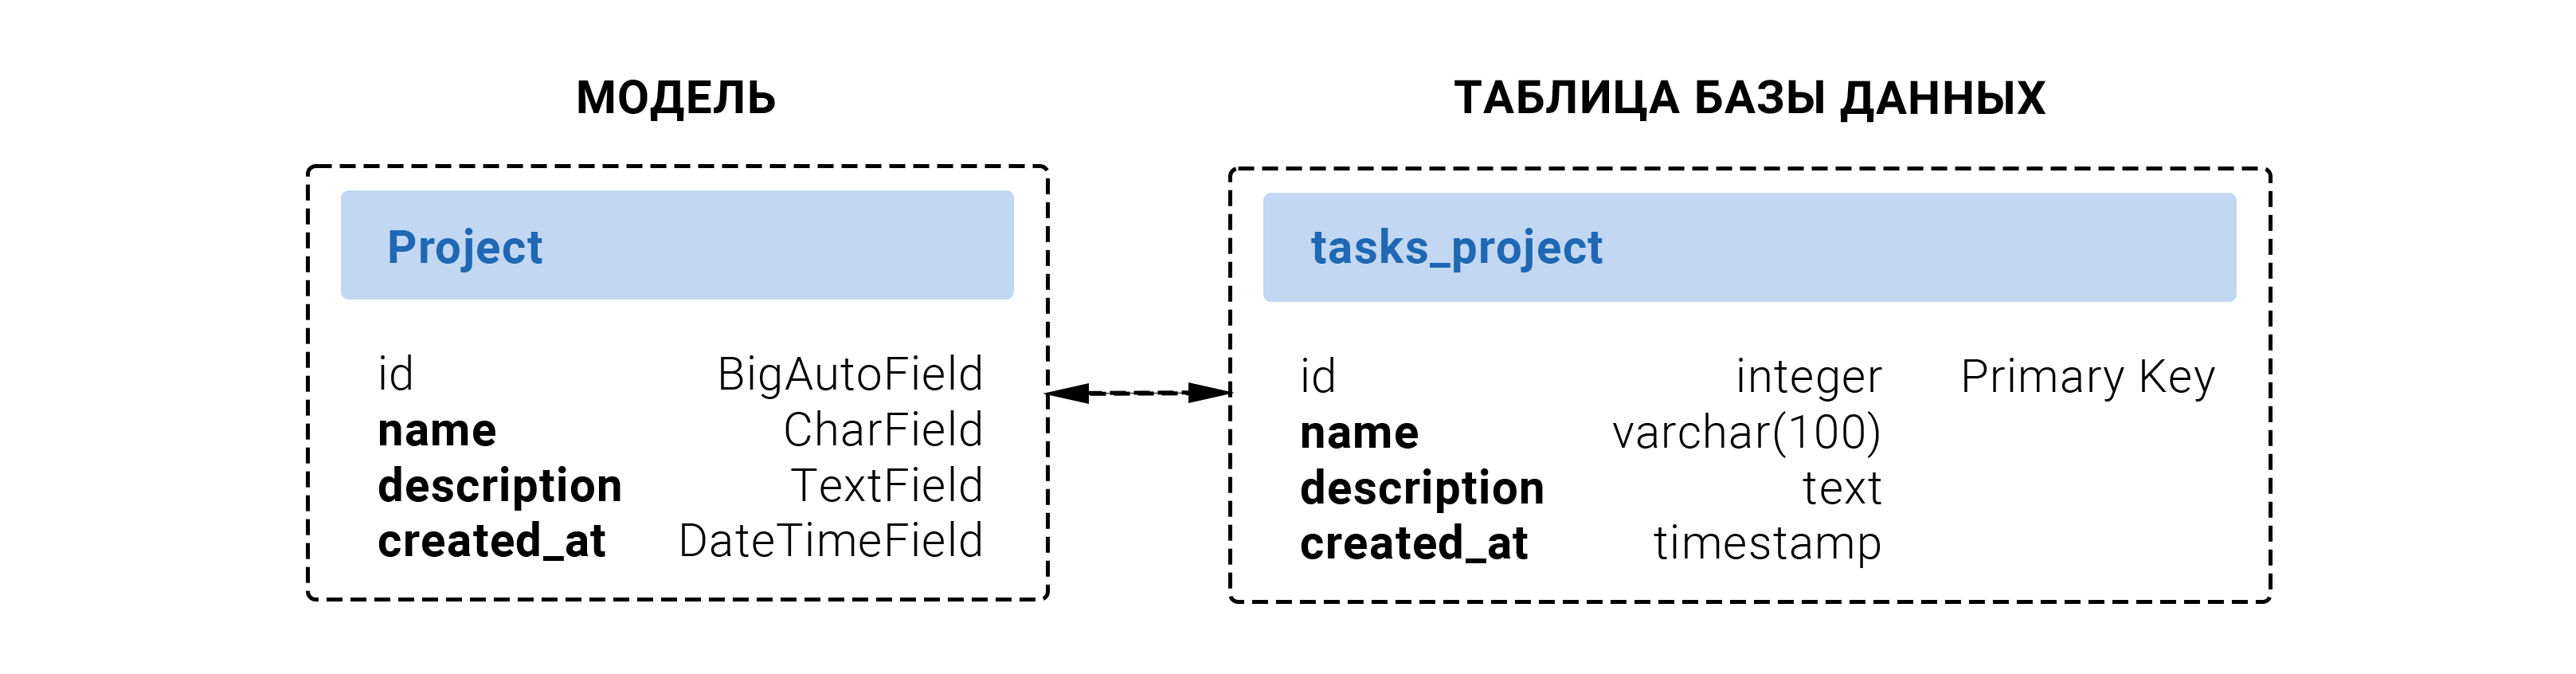

   Django по умолчанию добавляет поле автоматически увеличивающегося первичного ключа в каждую модель. Тип этого поля указывается в конфигурации каждого приложения либо глобально в настроечном параметре __DEFAULT_AUTO_FIELD__. При создании приложения командой __startapp__ значение параметра __DEFAULT_AUTO_FIELD__ по умолчанию имеет тип __BigAutoField__. Это 64-битное целое число, которое увеличивается автоматически в соответствии с доступными идентификаторами. Если не указывать первичный ключ своей модели, то Django будет добавлять это поле автоматически. В качестве первичного ключа можно также определить одно из полей модели, установив для него __primary_key=True__.

### Создание модели задачи

   Добавим модель Task, которая позволит нам создавать задачи внутри проектов. Добавьте следующие ниже строки в файл models.py приложения tasks.

In [ ]:
class Task(models.Model):
    project = models.ForeignKey(
        Project,
        related_name='tasks',
        on_delete=models.CASCADE
    )
    name = models.CharField(max_length=100)
    description = models.TextField()
    created_at = models.DateTimeField(auto_now_add=True)
    updated_at = models.DateTimeField(auto_now=True)

   Модель Task предназначена для представления задачи в системе управления проектами. Вот подробное описание каждого из полей модели:
   * __project__:<br></br>
       * Тип: __ForeignKey__ к модели Project
       * Описание: Устанавливает отношение один-ко-многим с моделью Project, что означает, что каждая задача связана с конкретным проектом.
       * Атрибут __related_name='tasks'__: Позволяет обращаться к задачам проекта через атрибут tasks.
       * Атрибут __on_delete=models.CASCADE__: Указывает, что при удалении проекта все связанные с ним задачи также будут удалены.<br></br>
   * __name__:<br></br>
       * Тип: __CharField__ с максимальной длиной 100 символов.
       * Описание: Название или заголовок задачи.<br></br>
   * __description__:<br></br>
       * Тип: __TextField__
       * Описание: Подробное описание задачи. TextField подходит для хранения длинного текста, поскольку не имеет ограничения по длине.<br></br>
   * __created_at__:<br></br>
       * Тип: __DateTimeField__
       * Описание: Автоматически устанавливает дату и время создания задачи.
       * Атрибут __auto_now_add=True__: При создании объекта будет установлена текущая дата и время.<br></br>
   * __updated_at__:<br></br>
       * Тип: __DateTimeField__
       * Описание: Автоматически обновляет дату и время при каждом сохранении объекта задачи.
       * Атрибут __auto_now=True__: При каждом сохранении объекта будет установлена текущая дата и время.<br></br>

### Добавление поля исполнителя

   Django идет в комплекте с фреймворком аутентификации, который ведет учетные записи пользователей. Встроенный в Django фреймворк аутентификации располагается в пакете __django.contrib.auth__ и содержит модель __User (Пользователь)__. Модель __User__ будет применяться из указанного фреймворка аутентификации, чтобы создавать взаимосвязи между пользователями и задачами.

   Импортируем встроенную в Django модель пользователя. Отредактируйте файл models.py приложения tasks, добавив в начало следующую строку:

In [ ]:
from django.contrib.auth.models import User

   И также добавив в модель Task новое поле:

In [ ]:
class Task(models.Model):
    project = models.ForeignKey(
        Project,
        related_name='tasks',
        on_delete=models.CASCADE
    )
    name = models.CharField(max_length=100)
    description = models.TextField()
    created_at = models.DateTimeField(auto_now_add=True)
    updated_at = models.DateTimeField(auto_now=True)
    
    # новое поле исполнителя задачи
    assignee = models.ForeignKey(
        User,
        related_name='tasks',
        on_delete=models.SET_NULL,
        null=True,
        blank=True
    )

В модель Task было добавлено следующее поле:

   * __assignee__:<br></br>
       * Тип: __ForeignKey__ к встроенной модели User Django.
       * Описание: Указывает на пользователя, которому назначена задача.
       * Атрибут __related_name='tasks'__: Позволяет обращаться к задачам, назначенным на пользователя, через атрибут tasks.
       * Атрибут __on_delete=models.SET_NULL__: Если пользователь удаляется, поле assignee в задаче устанавливается в NULL.
       * Атрибут __null=True__: Разрешает полю assignee быть пустым (в базе данных будет сохранено как NULL).
       * Атрибут __blank=True__: Разрешает поле быть пустым на уровне форм Django.

   Поле __assignee__ определяет взаимосвязь многие-к-одному, означающую, что каждая задача может быть закреплена за пользователем и пользователь может решать любое число задач. Для этого поля Django создаст внешний ключ в базе данных, используя первичный ключ соответствующей модели.<br></br>
   Атрибут __on_delete__ определяет поведение, которое следует применять при удалении объекта, на который есть ссылка. Это поведение не относится конкретно к Django; оно является стандартным для SQL.<br></br>
   Атрибут __related_name__ используется, чтобы указывать имя обратной связи от User к Task. Такой подход позволит легко обращаться к связанным объектам из объекта User, используя обозначение __user.tasks__.

### Ограничение возможных значения для полей

   Определим заранее, какой статус может быть у задачи. Он будет указываться в административной панели и мы сможем его менять только в пределах прописанных нами значений.
   Отредактируйте файл models.py приложения tasks, добавив следующие строки в модель Task:

In [ ]:
class Task(models.Model):
    
    # Кортеж из возможных статусов задачи
    STATUS_CHOICES = [
        ('New', 'Новая'),
        ('In_progress', 'В работе'),
        ('Completed', 'Завершена'),
    ]
    
    project = models.ForeignKey(
        Project,
        related_name='tasks',
        on_delete=models.CASCADE
    )
    name = models.CharField(max_length=100)
    description = models.TextField()
    created_at = models.DateTimeField(auto_now_add=True)
    updated_at = models.DateTimeField(auto_now=True)
    assignee = models.ForeignKey(
        User,
        related_name='tasks',
        on_delete=models.SET_NULL,
        null=True,
        blank=True
    )
    
    # новое поле статуса задачи
    status = models.CharField(
        max_length=50,
        choices=STATUS_CHOICES,
        default='New',
    )

В модель Task было добавлено следующее:
   * __STATUS_CHOICES__: Cписок кортежей, где первый элемент кортежа представляет значение, сохраняемое в базе данных, а второй элемент — удобочитаемое имя, которое будет отображаться в формах и административном интерфейсе Django.<br></br>
   * __status__:<br></br>
       * Тип: __CharField__ с максимальной длиной 50 символов.<br></br>
       * Описание: Статус задачи, который может использоваться для отслеживания её прогресса.<br></br>
       * Атрибут __choices=STATUS_CHOICES__: Аргумент в поле CharField, который позволяет установить ограниченный набор опций, из которых пользователь может выбирать. В нашем случае мы ограничили выбор нашим списком STATUS_CHOICES.<br></br>
       * Атрибут __default='New'__: Устанавливается значение по умолчанию для поля status, что означает, что при создании новой задачи, если статус не указан, он будет автоматически установлен в "Новая".<br></br>

### Активация приложения

   Отредактируйте файл settings.py, добавив 'tasks.apps.TasksConfig', в настроечный параметр INSTALLED_APPS. Это активирует приложение tasks в проекте.

In [ ]:
INSTALLED_APPS = [
    "django.contrib.admin",
    "django.contrib.auth",
    "django.contrib.contenttypes",
    "django.contrib.sessions",
    "django.contrib.messages",
    "django.contrib.staticfiles",
    # наше приложение tasks
    'tasks.apps.TasksConfig',
]

   Класс __TasksConfig__ – это конфигурация приложения. Теперь Django знает, что для этого проекта приложение является активным, и сможет загружать модели приложения.

### Создание и применение миграций

   Когда есть модели проектов и задач, необходимо создать соответствующие таблицы базы данных. Django идет в комплекте с системой миграции, которая отслеживает внесенные в модели изменения и позволяет их распространять по базе данных.
    Команда __migrate__ применяет миграции ко всем приложениям, перечисленным в __INSTALLED_APPS__. Она синхронизирует базу данных с текущими моделями и существующими миграциями.
    Прежде всего необходимо создать первоначальные миграции моделей __Project__ и __Task__.
    Выполните следующую ниже команду в командной оболочке из корневого каталога своего проекта:

In [ ]:
python manage.py makemigrations tasks

   Вы должны получить результат, аналогичный приведенному ниже:

In [ ]:
Migrations for 'tasks':
  tasks/migrations/0001_initial.py
    - Create model Project
    - Create model Task

   Внутри каталога миграций приложения tasks Django только что создал файл 0001_initial.py.<br></br>Эта миграция содержит инструкции SQL по созданию таблиц базы данных для моделей Project и Task. Миграция задает зависимости от других миграций и операций, которые необходимо выполнить в базе данных, чтобы синхронизировать ее с изменениями модели.

Примените следующую ниже команду в командной оболочке, чтобы воспользоваться существующими миграциями:

In [ ]:
python manage.py migrate

Вы получите результат, который заканчивается следующими строками:

In [ ]:
Running migrations:
  Applying tasks.0001_initial... OK

   Мы только что применили миграции приложений, перечисленных в __INSTALLED_APPS__, включая приложение __tasks__.<br></br>
   После применения миграций база данных отражает текущее состояние моделей.<br></br>
   Если вы внесете в файл __models.py__ любые правки, чтобы добавить, удалить либо изменить поля существующих моделей, либо добавите новые модели, то вам придется создать новые миграции, снова применив команду __makemigrations__. Каждая миграция дает Django возможность отслеживать изменения модели. Затем нужно применить миграцию командой __migrate__, чтобы синхронизировать базу данных с моделями.

# Домашнее задание

В ходе домашних заданий вы будете параллельно разрабатывать новое приложение "Контроль качества", которое будет использоваться для управления тестированием продукта, отслеживания багов и запросов на улучшение.

__Основные функции:__
   * Создание, управление и отслеживание баг-репортов и запросов на улучшение.
   * Возможность связывать баг-репорты и запросы с конкретными задачами и проектами.
   * Поддержка процесса тестирования с помощью тест-кейсов и чек-листов.

1. __Создание приложения__
   * Создайте новое приложение "quality_control" внутри нашего проекта project_tracker
   * В файле settings.py подключите новое приложение.

2. __Определение моделей__
   * Создайте модель __BugReport__ со следующими полями:
      * __title__: Краткое описание бага (название).
      * __description__: Полное описание бага.
      * __project__: Связь с моделью Project из приложения tasks. При удалении объекта проекта, связанный с ним BugReport тоже должен удаляться.
      * __task__: Связь с моделью Task из приложения tasks. При удалении объекта задачи, связанный с ним BugReport должен выставляться в NULL.
      * __status__: Статус бага (например, "Новая", "В работе", "Завершена").
      * __priority__: Приоритет бага (можно использовать пятибалльную шкалу).
      * __created_at__: Дата и время создания записи.
      * __updated_at__: Дата и время последнего обновления записи.
   * Создайте модель __FeatureRequest__ со следующими полями:
      * __title__: Название запроса на новую функцию.
      * __description__: Описание запроса.
      * __project__: Связь с моделью Project из приложения tasks. При удалении объекта проекта, связанный с ним объект FeatureRequest тоже должен удаляться.
      * __task__: Связь с моделью Task из приложения tasks. При удалении объекта задачи, связанный с ним объект FeatureRequest должен выставляться в NULL.
      * __status__: Статус запроса (например, "Рассмотрение", "Принято", "Отклонено").
      * __priority__: Приоритет запроса.
      * __created_at__: Дата и время создания запроса.
      * __updated_at__: Дата и время последнего обновления запроса.

3. __Миграции__
   * Выполните миграции для добавления созданных моделей в вашу базу данных.

Ссылка на документацию Django: https://docs.djangoproject.com/en/5.0/